<a href="https://colab.research.google.com/github/carlitos9087/Caderno_de_anotacoes_python/blob/main/analise_primaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bibliotecas

In [1]:
#importação de bibliotecas
# !pip install seaborn==0.12.0

import seaborn as sns
sns.__version__
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

# Funções

## Capta_tabelas

In [2]:
def capta_tabelas(caminho:str):
    df=[]
    for num, pasta in enumerate(os.listdir(caminho)):
        df.append(pd.read_table(os.path.join(caminho, pasta)))   #lendo tabelas tabelas
        if df[num].index.name != 'Geneid':
          df[num].set_index('Geneid', inplace=True)  #tornando a colula Geneid o id das tabelas
    return df 

## Junta_tabelas

In [3]:
def junta_tabelas(lista_tabelas:list, lista_titulos:list):
    df_todos = pd.merge(lista_tabelas[0], lista_tabelas[1], on="Geneid")

    for itens in lista_tabelas[2:]:
        df_todos = pd.merge(df_todos, itens, on="Geneid")
        
    df_todos.columns = lista_titulos
    return df_todos
    

## Ordenandor_titulos 1,2 e 3

In [ ]:
def ordenandor_titulos1(titulos_iniciais:list):
    lista_nomes_corretos  = []
    lista_nomes_corretos2 = []
    lista_nomes_corretos3 = []
    for titulo in titulos_iniciais:
        pattern = '_SRR[0-9]*.tabular'
        string = titulo
        repl = ''
        lista_nomes_corretos.append(re.sub(pattern, repl, string))
    for i in lista_nomes_corretos:
      i = i.split("_")
      if len(i[-1]) == 1:
        i.insert(-1, "_0")
      else:
        i.insert(-1, "_")
      lista_nomes_corretos2.append(i)
    # a = "".join(lista_nomes_corretos2)
    # return  a
    return lista_nomes_corretos

In [ ]:
def ordenandor_titulos2(titulos_iniciais:list):
    lista_nomes_corretos  = []
    lista_nomes_corretos2 = []
    lista_nomes_corretos3 = []
    resultado = []

    for titulo in titulos_iniciais:
        pattern = '_SRR[0-9]*.tabular'
        string = titulo
        repl = ''
        lista_nomes_corretos.append(re.sub(pattern, repl, string))

    for i in lista_nomes_corretos:
      i = i.split("_")
      
      if len(i[-1]) == 1:
        i.insert(-1, "_0")
      else:
        i.insert(-1, "_")
      lista_nomes_corretos2.append(i)
    
    for nomes_partidos in lista_nomes_corretos2:
      if len(nomes_partidos) == 3:
        aux1 = "".join(nomes_partidos)
        resultado.append(aux1)
      else:
        for num in range(1,len(nomes_partidos)):
          if num % 2 == 0: continue
          nomes_partidos.insert(num, "_")
        aux2 = "".join(nomes_partidos)
        resultado.append(aux2)

    return resultado


In [ ]:
def ordenandor_titulos3(titulos_iniciais:list):
    lista_nomes_corretos  = []
    lista_nomes_corretos2 = []
    lista_nomes_corretos3 = []
    resultado = []

    for titulo in titulos_iniciais:
        pattern = '_[a-zA-Z]+[0-9]*.tabular'
        string = titulo
        repl = ''
        lista_nomes_corretos.append(re.sub(pattern, repl, string))

    for i in lista_nomes_corretos:
      i = i.split("_")
      
      if len(i[-1]) == 1:
        i.insert(-1, "_0")
      else:
        i.insert(-1, "_")
      lista_nomes_corretos2.append(i)
    
    for nomes_partidos in lista_nomes_corretos2:
      if len(nomes_partidos) == 3:
        aux1 = "".join(nomes_partidos)
        resultado.append(aux1)
      else:
        for num in range(1,len(nomes_partidos)):
          if num % 2 == 0: continue
          nomes_partidos.insert(num, "_")
        aux2 = "".join(nomes_partidos)
        resultado.append(aux2)

    return resultado

In [ ]:
def junta_lista_nomes_ordenados(listas: list):
  res = []
  for nomes_partidos in listas:
    if len(nomes_partidos) == 3:
      aux1 = "".join(nomes_partidos)
      res.append(aux1)

    else:
      for num in range(1,len(nomes_partidos)):
        if num % 2 == 0: continue
        nomes_partidos.insert(num, "-")
      aux2 = "".join(nomes_partidos)
      res.append(aux2)
  return res


## somas_reads

In [ ]:
def soma_reads(dataframe, nomes: list):
    somas=[i for i in dataframe.sum()]

    df_somas = pd.DataFrame(somas, columns=nomes)
    return df_somas/1000000
    

#GSE162760

In [4]:
#importação de bibliotecas
dados='/content/drive/MyDrive/Laboratory/Alunos/Carlos/SRR files/Leishmania/GSE162760'#local da pasta
import re
import os
import pandas as pd

pd.set_option('display.max_columns', None)


id_genes=[8520, 2648, 8850, 10524, 7994, 23522, 11143, 84148, 9329, 1387, 79969, 2033, 3065, 3066, 8841, 9759, 10014, 10013, 51564, 55869, 9734, 83933, 23411, 22933, 23410, 23409, 23408, 51548, 51547]
df,renomear=[],[]#declaração de variaveis

renomear = ordenandor_titulos2(os.listdir(dados))
nomes = [i for i in renomear]


df = capta_tabelas(dados)
#renomear
#df

NameError: name 'ordenandor_titulos2' is not defined

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:

import PySimpleGUI as sg

# Layout da interface
layout = [
    [sg.Text("Digite o texto que deseja salvar em um arquivo:")],
    [sg.Multiline(size=(40, 5), key="-TEXTO-")],
    [sg.Button("Salvar em Arquivo"), sg.Button("Sair")],
]

# Janela
window = sg.Window("Salvar Texto em Arquivo", layout, finalize=True)

# Loop de eventos
while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == "Sair":
        break
    elif event == "Salvar em Arquivo":
        texto = values["-TEXTO-"]

        # Abra um arquivo para escrita e salve o texto
        try:
            with open("texto_salvo.txt", "w") as arquivo:
                arquivo.write(texto)
            sg.popup("Texto salvo com sucesso como 'texto_salvo.txt'")
        except Exception as e:
            sg.popup_error(f"Erro ao salvar o arquivo: {str(e)}")

# Feche a janela
window.close()


In [5]:
#importação de bibliotecas
import re
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

caminho_imagens = "/content/drive/MyDrive/Carlos/imagens"
tabela_completa = pd.read_csv('/content/drive/MyDrive/Laboratory/Alunos/Carlos/arquivos/download (1).csv')

colunas = tabela_completa.columns.to_list()
colunas = colunas [ 1:]
tabela_completa.set_index("Gene_id", inplace=True)
df_graficos = tabela_completa.T
Status = []

for i in colunas : 
  if i.startswith("Inf"): Status.append("Infected")
  if i.startswith("Non"): Status.append("Non-Infected")

df_graficos["Status"] = Status
colunas3 = df_graficos.columns.to_list()
colunas3 = colunas3[:-1]

kat  = [i for i in colunas3 if i.startswith("KAT")]
hdac = [i for i in colunas3 if i.startswith("HDA")]
sirt = [i for i in colunas3 if i.startswith("SIR")]

''' display(df_graficos.loc[['Infected_Lbr_08'],kat],
            df_graficos.loc[['Infected_Lbr_08'],hdac],
            df_graficos.loc[['Infected_Lbr_08'],sirt]) ''' #verifiva o paciente 8

tabela_altlier = df_graficos.drop(['Infected_Lbr_08'])
tabela_altlier = tabela_altlier.rename(columns = {'estado':"Status"})

nova_lista=[i.replace("/","-") for i in colunas3 ]#'HAT1-8520','KAT2A-2648'....

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Laboratory/Alunos/Carlos/arquivos/download (1).csv'

: 

In [ ]:
colunas3



['HAT1/8520',
 'KAT2A/2648',
 'KAT2B/8850',
 'KAT5/10524',
 'KAT6A/7994',
 'KAT6B/23522',
 'KAT7/11143',
 'KAT8/84148',
 'KAT12/9329',
 'CREBBP/1387',
 'aTAT1/79969',
 'p300/2033',
 'HDAC1/3065',
 'HDAC2/3066',
 'HDAC3/8841',
 'HDAC4/9759',
 'HDAC5/10014',
 'HDAC6/10013',
 'HDAC7/51564',
 'HDAC8/55869',
 'HDAC9/9734',
 'HDAC10/83933',
 'SIRT1/23411',
 'SIRT2/22933',
 'SIRT3/23410',
 'SIRT4/23409',
 'SIRT5/23408',
 'SIRT6/51548',
 'SIRT7/51547']

# Gráficos_GSE162760

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


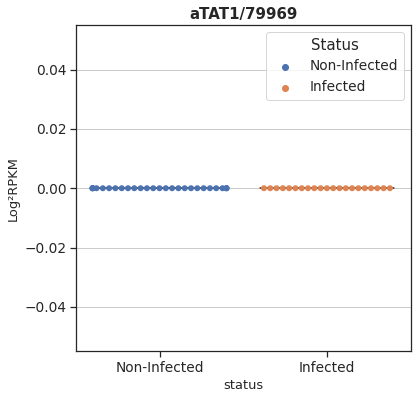

carregando


In [ ]:
from seaborn.utils import ci
# sns.set_theme(style="darkgrid")
sns.set_theme(style="ticks", font_scale=1.25) 
for i in colunas3:
  #if i not in ['SIRT4/23409', 'CREBBP/1387','KAT2A/2648']: continue
  if i not in ['aTAT1/79969']: continue

  #break #<---------------------------------------quebrei
  plt.figure(figsize=(6,6))

  graficos = sns.swarmplot(data = tabela_altlier.sort_values("Status", ascending=False), x="Status",
                           y=i, size=6, dodge=False
                           ,hue="Status"
                           );
  graficos = sns.boxplot(
                         data = tabela_altlier.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True, whiskerprops={'linewidth':1}
                         )
  plt.grid(axis='y', color='0.80')
  #graficos.set_ylim([-3, 7])
  nome_grafico=i.replace("/","-")


  graficos = plt.title(i, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});

  #plt.savefig((f'{caminho_imagens}/KAT/{nome_grafico}.tif'), dpi=600, format='tif', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando")

In [ ]:
colunas3 


['HAT1/8520',
 'KAT2A/2648',
 'KAT2B/8850',
 'KAT5/10524',
 'KAT6A/7994',
 'KAT6B/23522',
 'KAT7/11143',
 'KAT8/84148',
 'KAT12/9329',
 'CREBBP/1387',
 'aTAT1/79969',
 'p300/2033',
 'HDAC1/3065',
 'HDAC2/3066',
 'HDAC3/8841',
 'HDAC4/9759',
 'HDAC5/10014',
 'HDAC6/10013',
 'HDAC7/51564',
 'HDAC8/55869',
 'HDAC9/9734',
 'HDAC10/83933',
 'SIRT1/23411',
 'SIRT2/22933',
 'SIRT3/23410',
 'SIRT4/23409',
 'SIRT5/23408',
 'SIRT6/51548',
 'SIRT7/51547']

<ipython-input-34-77572a0d071e>:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3540: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

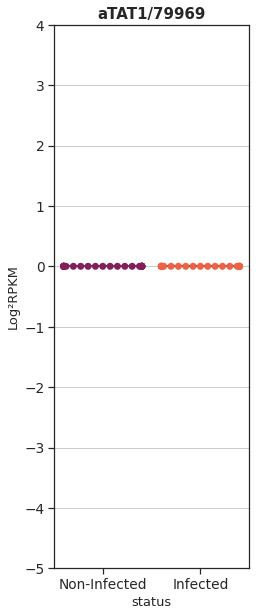

carregando


In [ ]:
#sns.set_style("whitegrid")
#sns.set_theme(style="darkgrid")

sns.set_theme(style="ticks", font_scale=1.25) 

for i in colunas3:
  #if i not in ['SIRT4/23409', 'CREBBP/1387','KAT2A/2648']: continue]
  if i not in ['aTAT1/79969']: continue
  #break #<----------------------------------------------------------
  plt.figure(figsize=(3.5,10))#x,y
  plt.grid(axis='y', color='0.80')

  graficos = sns.swarmplot(
      data = tabela_altlier.sort_values("Status", ascending=False),
      x="Status", y=i, size=7, dodge=False,
      palette="rocket", edgecolor='black'#, hue = "Status"
      )
  
  
  graficos = sns.boxplot(
                         data = tabela_altlier.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1}
                         )
  
  graficos.set_ylim([-5, 4])
  nome_grafico=i.replace("/","-")


  graficos = plt.title(i, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
  
  plt.savefig((f'{caminho_imagens}/GSE162760_img/SIRT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando")

<ipython-input-16-3f604151001b>:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-16-3f604151001b>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/GSE162760_img/KAT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-16-3f604151001b>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/GSE162760_img/KAT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-16

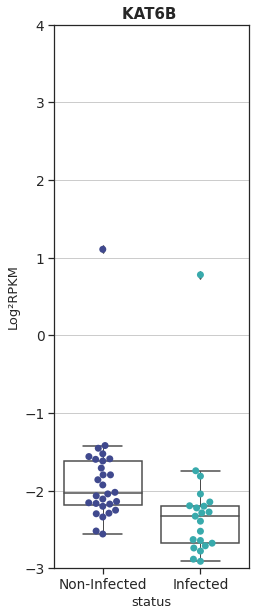

carregando


In [ ]:
#sns.set_style("whitegrid")
#sns.set_theme(style="darkgrid")
sns.set_theme(style="ticks", font_scale=1.25) 

for i in kat:
  if i not in [ 'KAT6B/23522']: continue
  #break #<----------------------------------------------------------
  plt.figure(figsize=(3.5,10))#x,y
  pattern = '/[0-9]*'
  string = i
  repl = ' '
        
  plt.grid(axis='y', color='0.80')
  nome_grafico = re.sub(pattern, repl, string)

  graficos = sns.swarmplot(
      data = tabela_altlier.sort_values("Status", ascending=False),
      x="Status", y=i, size=7, dodge=False,
      palette="mako", 
      edgecolor='black'#, hue = "Status"
      )
  
  
  graficos = sns.boxplot(
                         data = tabela_altlier.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1}
                         )
  
  graficos.set_ylim([-3, 4])
  #nome_grafico=i.replace("/","-")


  graficos = plt.title(nome_grafico, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});

  #plt.savefig((f'{caminho_imagens}/KAT/{nome_grafico}.tif'), dpi=600, format='tif', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.savefig((f'{caminho_imagens}/GSE162760_img/KAT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando")

<ipython-input-17-9016b5cd5caa>:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-17-9016b5cd5caa>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/GSE162760_img/HDAC/png/{nome_grafico}_______2.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-17-9016b5cd5caa>:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/GSE162760_img/HDAC/png/{nome_grafico}_______2.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')

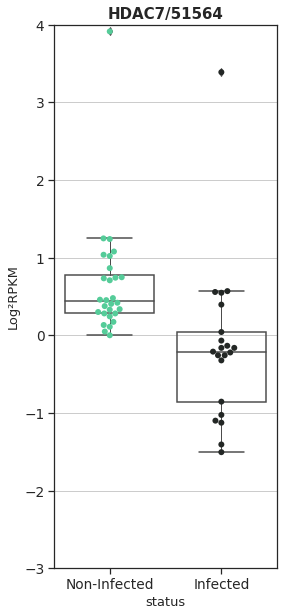

carregando
carregando


In [ ]:
gse162760 = [hdac[i] for i in [4,8,9]]
from seaborn.utils import ci
#sns.set_style("whitegrid")
#sns.set_theme(style="darkgrid")
sns.set_theme(style="ticks", font_scale=1.25) 

for i in hdac:
  if i not in ['HDAC7/51564']: continue
  #break #<----------------------------------------------------------
  
  plt.figure(figsize=(4,10));#x,y
  plt.grid(axis='y', color='0.80');


  graficos = sns.boxplot(
                         data = tabela_altlier.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1}
                         );
  
  graficos = sns.swarmplot(
      data = tabela_altlier.sort_values("Status", ascending=False),
      x="Status", y=i, size=6, dodge=False,
      palette="dark:#5C9_r", edgecolor='black'#, hue = "Status"
      );
  
  
  graficos.set_ylim([-3, 4])
  nome_grafico=i.replace("/","-");


  graficos = plt.title(i, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});

  #plt.savefig((f'{caminho_imagens}/HDAC/{nome_grafico}.tif'), dpi=600, format='tif', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.savefig((f'{caminho_imagens}/GSE162760_img/HDAC/png/{nome_grafico}_______2.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando");  
  print("carregando");

In [ ]:
gse162760 = []
gse162760 = [hdac[i] for i in [4,8,9]]
gse162760
sirt
gse162760



['HDAC5/10014', 'HDAC9/9734', 'HDAC10/83933']

# SRP069976

In [ ]:
caminho_SRP069976 = "/content/drive/MyDrive/Carlos/SRR files/Leishmania/SRP069976"
id_genes=[8520, 2648, 8850, 10524, 7994, 23522, 11143, 84148, 9329, 1387, 79969, 2033, 3065, 3066, 8841, 9759, 10014, 10013, 51564, 55869, 9734, 83933, 23411, 22933, 23410, 23409, 23408, 51548, 51547]
id_genes2= ['HAT1/8520', 'KAT2A/2648', 'KAT2B/8850', 'KAT5/10524', 'KAT6A/7994', 'KAT6B/23522', 'KAT7/11143', 'KAT8/84148', 'KAT12/9329', 'CREBBP/1387', 'aTAT1/79969', 'p300/2033', 'HDAC1/3065', 'HDAC2/3066', 'HDAC3/8841', 'HDAC4/9759', 'HDAC5/10014', 'HDAC6/10013', 'HDAC7/51564', 'HDAC8/55869', 'HDAC9/9734', 'HDAC10/83933', 'SIRT1/23411', 'SIRT2/22933', 'SIRT3/23410', 'SIRT4/23409', 'SIRT5/23408', 'SIRT6/51548', 'SIRT7/51547']

#Lendo as tabelas do drive 
tabelas_SRP069976 = capta_tabelas(caminho_SRP069976)
nomes = os.listdir(caminho_SRP069976)

#Renomenado as listas 
renomear = ordenandor_titulos2(nomes)

#juntando tabelas
tabelas = junta_tabelas(tabelas_SRP069976, renomear)
renomear.sort()
#somando reads
reads = tabelas[renomear].sum()/1000000
tabela_reads = pd.DataFrame(reads)
tabela_reads = tabela_reads.T
#tabela_reads.to_excel("/content/drive/MyDrive/Carlos/arquivos/reads_SRP069976.xlsx")


In [ ]:
final_SRP069976 = pd.read_excel("/content/drive/MyDrive/Carlos/arquivos/SRP069976.xlsx")
final_SRP069976 = final_SRP069976.iloc[133:]
final_SRP069976["Gene_id"] = id_genes2
final_SRP069976.set_index("Gene_id", inplace = True)
#final_SRP069976["Status"] = status_SRP069976
if final_SRP069976.loc[ 'aTAT1/79969'] == 
final_SRP069976

,Health_01,Health_02,Health_03,Health_04,Health_05,Health_06,Health_07,Health_08,Health_09,Health_10,Lama_Chronic_Infection_01,Lama_Chronic_Infection_02,Lama_Chronic_Infection_03,Lama_Chronic_Infection_04,Lama_Chronic_Infection_05,Lama_Chronic_Infection_06,Lama_Early_Infection_01,Lama_Early_Infection_02,Lama_Early_Infection_03,Lama_Early_Infection_04,Lama_Early_Infection_05,Lama_Early_Infection_06,Lama_Early_Infection_07,Lama_Early_Infection_08,Lama_Late_Infection_01,Lama_Late_Infection_02,Lama_Late_Infection_03,Lama_Late_Infection_04,Lama_Late_Infection_05,Lama_Late_Infection_06,Lama_Late_Infection_07,Lama_Late_Infection_08,Lama_Late_Infection_09,Lama_Late_Infection_10,Lama_Late_Infection_11,Lama_Late_Infection_11.1,Lama_Late_Infection_11.2,Lama_Late_Infection_11.3,Lama_Late_Infection_12,Lama_Late_Infection_13,Lama_Late_Infection_14,Lama_Late_Infection_15,Lama_Late_Infection_16
Gene_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HAT1/8520,-0.500479,-0.71698,-0.495448,-0.143729,-0.661282,-0.257289,-0.205647,-0.451838,-0.925133,-0.089682,-0.520672,-0.52236,-0.22021,-0.341208,-0.079265,-1.145363,0.560311,-0.18103,-0.026339,0.036215,0.022227,0.259086,0.370806,-0.246428,-0.598051,-0.586422,-0.234696,-0.171173,-0.456369,-0.384484,-0.422446,-0.249048,-0.175922,-0.309815,0.514565,0.050634,0.514565,0.050634,-0.533876,-0.635569,-0.27165,-0.303324,-0.658377
KAT2A/2648,0.717733,1.487794,2.085665,2.192188,2.842787,3.630107,2.846264,3.029319,0.625725,2.565093,2.67905,2.632142,2.653078,2.557645,2.69615,2.30848,-0.228173,1.186271,1.39949,1.423131,1.8916,0.619094,0.559207,1.637332,1.07278,0.98144,0.870521,0.396693,0.285346,1.030215,2.285342,2.186665,1.818401,1.984594,1.236314,0.949321,1.236314,0.949321,2.274462,1.917851,1.738063,1.41802,1.631434
KAT2B/8850,-1.895996,-1.549324,-0.800397,-0.525128,-0.851082,-0.559826,-0.226926,-0.607939,-2.300927,-1.286136,-1.717757,-1.96464,-1.846967,-2.042007,-1.361817,-1.520137,-2.465068,-1.063243,-0.87343,-0.875848,-0.881517,-1.07089,-0.857249,-1.099953,-1.390754,-1.60036,-1.342556,-1.941171,-1.705515,-1.454995,-0.935075,-1.104771,-0.993347,-0.956121,-1.030938,-1.696761,-1.030938,-1.696761,-1.522108,-1.333779,-1.177911,-1.157105,-1.193445
KAT5/10524,1.401684,1.88284,2.036888,2.080848,2.183374,2.24904,2.097079,2.243794,1.389323,1.59457,2.219979,2.07831,2.03485,1.768526,2.341839,0.480179,0.857057,1.839206,1.849087,2.016978,1.841962,1.7697,2.028487,2.123858,1.977999,1.670261,1.89514,1.580391,1.546266,1.715443,1.87304,1.716973,1.792726,1.595376,1.671501,1.698144,1.671501,1.698144,1.90231,1.895637,2.134198,2.156778,1.807293
KAT6A/7994,-1.13154,-0.940246,0.262131,0.526647,0.203303,0.199556,0.246065,0.015328,-2.687293,-0.304542,-2.149186,-2.454444,-2.407237,-2.559667,-1.56146,-2.217459,-3.085029,#REF!,0.116332,-0.349102,-0.055576,0.005513,-0.037547,-0.457023,-0.331882,-0.574523,-0.088947,-0.411444,-0.787054,-0.085952,0.205472,-0.289629,-0.15895,-0.243958,0.165804,-0.258037,0.165804,-0.258037,-0.338441,-0.448755,-0.372181,0.01663,-0.289838
KAT6B/23522,-3.877521,-3.362515,-1.914681,-2.070051,-2.075508,-1.931856,-2.011784,-2.314508,-4.277001,-2.617155,-3.960332,-3.866053,-4.430661,-4.083413,-3.285016,-4.284749,-5.88317,-2.798591,-2.391708,-2.578584,-2.326223,-2.373283,-2.412428,-2.697993,-2.582875,-3.086896,-2.488117,-3.377418,-3.437927,-2.406709,-2.074975,-2.813581,-2.502933,-2.352449,-2.575355,-2.808155,-2.575355,-2.808155,-2.478445,-2.984283,-2.613055,-2.615069,-2.994652
KAT7/11143,-0.467831,-0.27704,0.337361,0.462134,0.12535,0.234546,0.118685,0.230224,-0.965744,-0.017025,-0.635625,-0.844849,-0.482828,-1.022466,-0.290682,-0.872266,-0.665824,-0.005812,0.087879,-0.035491,0.034096,0.145949,0.208364,-0.200873,0.069913,-0.157731,-0.0796,0.022907,-0.266823,0.085497,0.076646,-0.10669,0.042401,-0.016352,-0.09087,-0.042619,-0.09087,-0.042619,0.007845,-0.360458,0.011331,0.120994,0.03212
KAT8/84148,-0.203648,0.143911,0.948735,0.89108,1.17481,1.087063,0.779765,1.315628,0.075427,0.988398,1.209595,1.120366,0.861484,1.086421,1.20

In [ ]:
colunas_SRP069976 = final_SRP069976.columns.to_list()
status_SRP069976 = []

for titulo in colunas_SRP069976:
  # 'Lama_Late_Infection_11.3',
  pattern = '_[0-9]*[.]?[0-9]?'
  string = titulo
  repl = ''

  status_SRP069976.append(re.sub(pattern, repl, string))

len(status_SRP069976)

#final_SRP069976["Status"] = status_SRP069976

43

In [ ]:
final_SRP069976 = final_SRP069976.T
final_SRP069976.head(1)

if ("Status" in final_SRP069976.columns.to_list()) == False:
  final_SRP069976["Status"] = status_SRP069976
  print("Status foi adicionado")
else:
  print("Status não foi adicionado ")



Status foi adicionado


In [ ]:
from numpy import float64
capta_nomes = final_SRP069976.columns.to_list()
capta_nomes = capta_nomes[:-1]
capta_nomes

for i in (capta_nomes):
   final_SRP069976[i] = pd.to_numeric(final_SRP069976[i], errors='coerce')

final_SRP069976.dtypes



Gene_id
HAT1/8520       float64
KAT2A/2648      float64
KAT2B/8850      float64
KAT5/10524      float64
KAT6A/7994      float64
KAT6B/23522     float64
KAT7/11143      float64
KAT8/84148      float64
KAT12/9329      float64
CREBBP/1387     float64
aTAT1/79969     float64
p300/2033       float64
HDAC1/3065      float64
HDAC2/3066      float64
HDAC3/8841      float64
HDAC4/9759      float64
HDAC5/10014     float64
HDAC6/10013     float64
HDAC7/51564     float64
HDAC8/55869     float64
HDAC9/9734      float64
HDAC10/83933    float64
SIRT1/23411     float64
SIRT2/22933     float64
SIRT3/23410     float64
SIRT4/23409     float64
SIRT5/23408     float64
SIRT6/51548     float64
SIRT7/51547     float64
Status           object
dtype: object

# Gráficos_SRP069976


<ipython-input-24-9fbd7ac4a294>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  graficos.set_xticklabels(graficos.get_xticklabels(), rotation=20, horizontalalignment='right')


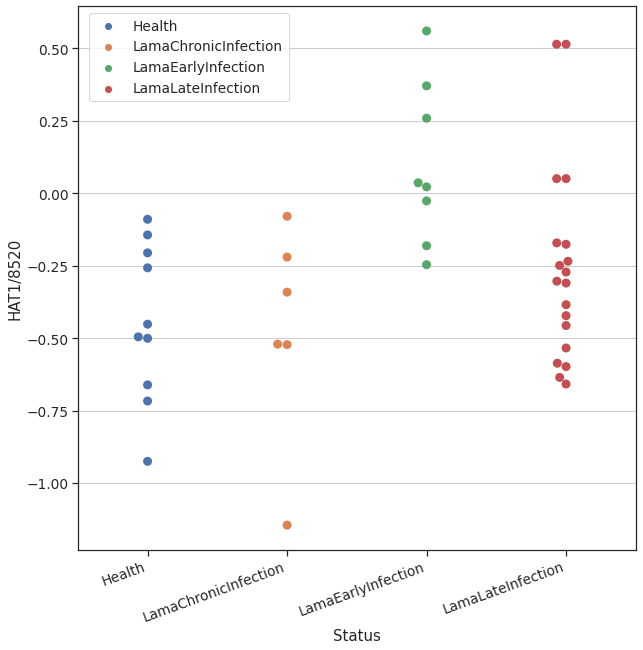

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
plt.figure(figsize=(10,10))#x,y

plt.grid(axis='y', color='0.80')
graficos = sns.swarmplot(data=final_SRP069976,size = 9, y="HAT1/8520",hue="Status", x="Status")
graficos.set_xticklabels(graficos.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.legend(loc="upper right",bbox_to_anchor=(0.39,1))

In [ ]:
def gerador_graficos( lista : list , x, y):
  #sns.set_theme(style="darkgrid")
  sns.set_theme(style="ticks", font_scale=1)
 
  for i in lista:
    #if i not in ['HDAC5/10014', 'HDAC9/9734', 'HDAC10/83933','SIRT6/51548']: continue 
    if i not in ['KAT6A/7994','KAT12/9329']: continue

    #break #<----------------------------------------------------------
    plt.figure(figsize=(x,y));#x,y
    plt.grid(axis='y', color='0.80')


    graficos = sns.swarmplot(
      data = final_SRP069976.sort_values("Status", ascending=False),
      x="Status", y=i, size=7, dodge=False, alpha=.80,
      palette="rocket", edgecolor='black', #hue = "Status",
      linewidth= 1, ec="Black");
  
  
    graficos = sns.boxplot(
                         data = final_SRP069976.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1}
                         );
  
    graficos.set_ylim([-3, 1]);
    nome_grafico=i.replace("/","-");


    graficos.set_xticklabels(graficos.get_xticklabels(), horizontalalignment='center')
    graficos = plt.title(i, fontsize=15, weight= 'bold');
    graficos = plt.xlabel('status', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});

    plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
    plt.show(graficos);
    print("carregando");


<ipython-input-25-516efa49b303>:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-25-516efa49b303>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-25-516efa49b303>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-25-516efa49b303>:3

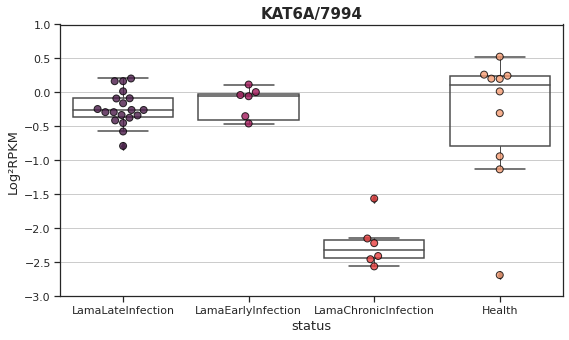

carregando


<ipython-input-25-516efa49b303>:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-25-516efa49b303>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-25-516efa49b303>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-25-516efa49b303>:3

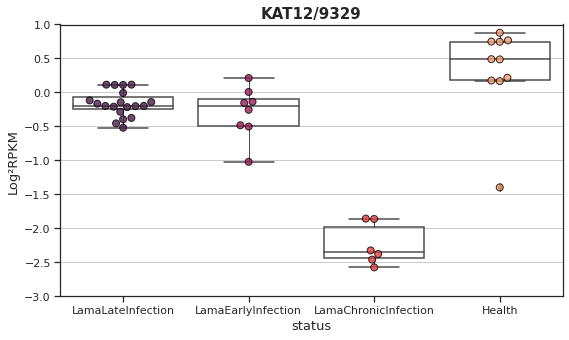

carregando


In [ ]:
gerador_graficos(colunas3,9,5)

<ipython-input-36-1c424c93daa3>:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-36-1c424c93daa3>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-36-1c424c93daa3>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
<ipython-input-36-1c424c93daa3>:3

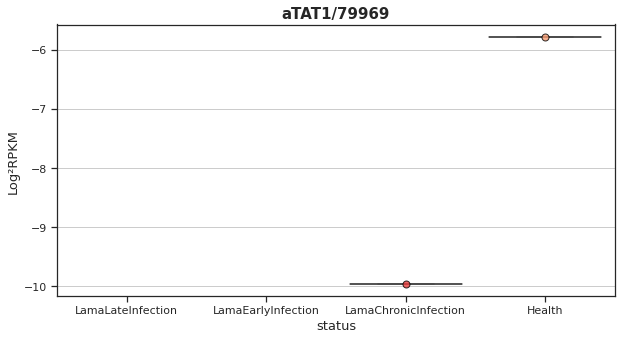

carregando


In [ ]:
#sns.set_style("whitegrid")
#sns.set_theme(style="darkgrid")
sns.set_theme(style="ticks", font_scale=1)

for i in capta_nomes:
  #if i not in ['SIRT4/23409', 'CREBBP/1387','KAT2A/2648']: continue
  if i not in ['aTAT1/79969']: continue
 
  #break #<----------------------------------------------------------
  plt.figure(figsize=(10,5));#x,y

  plt.grid(axis='y', color='0.80')
  graficos = sns.swarmplot(
      data = final_SRP069976.sort_values("Status", ascending=False),
      x="Status", y=i, size=7, dodge=False, alpha=.80,
      palette="rocket", edgecolor='black', #hue = "Status",
      linewidth= 1, ec="Black");
  
  
  graficos = sns.boxplot(
                         data = final_SRP069976.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1}
                         );
  
  #graficos.set_ylim([-6, 4]);
  nome_grafico=i.replace("/","-");


  graficos.set_xticklabels(graficos.get_xticklabels(), rotation=0, horizontalalignment='center')
  graficos = plt.title(i, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});

  plt.savefig((f'{caminho_imagens}/SRP069976_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando");

# PRJEB36928

In [ ]:
caminho_PRJEB36928 = "/content/drive/MyDrive/Carlos/SRR files/Leishmania/PRJEB36928"
tabela_PRJEB36928 = []

id_genes=[8520, 2648, 8850, 10524, 7994, 23522, 11143, 84148, 9329, 1387, 79969, 2033, 3065, 3066, 8841, 9759, 10014, 10013, 51564, 55869, 9734, 83933, 23411, 22933, 23410, 23409, 23408, 51548, 51547]
id_genes2= ['HAT1/8520', 'KAT2A/2648', 'KAT2B/8850', 'KAT5/10524', 'KAT6A/7994', 'KAT6B/23522', 'KAT7/11143', 'KAT8/84148', 'KAT12/9329', 'CREBBP/1387', 'aTAT1/79969', 'p300/2033', 'HDAC1/3065', 'HDAC2/3066', 'HDAC3/8841', 'HDAC4/9759', 'HDAC5/10014', 'HDAC6/10013', 'HDAC7/51564', 'HDAC8/55869', 'HDAC9/9734', 'HDAC10/83933', 'SIRT1/23411', 'SIRT2/22933', 'SIRT3/23410', 'SIRT4/23409', 'SIRT5/23408', 'SIRT6/51548', 'SIRT7/51547']

#Lendo as tabelas do drive 
tabela_PRJEB36928 = capta_tabelas(caminho_PRJEB36928)
nomes_PRJEB36928 = os.listdir(caminho_PRJEB36928)

#Renomenado as listas 
renomear_PRJEB36928 = ordenandor_titulos3(nomes_PRJEB36928)

#juntando tabelas
tabelas = junta_tabelas(tabela_PRJEB36928, renomear_PRJEB36928)
tabelas
renomear_PRJEB36928.sort()

#somando reads
reads_PRJEB36928 = tabelas[renomear_PRJEB36928].sum()/1000000
tabela_reads_PRJEB36928 = pd.DataFrame(reads_PRJEB36928)
tabela_reads_PRJEB36928 = tabela_reads_PRJEB36928.T
tabela_reads_PRJEB36928

#tabela_reads_PRJEB36928.to_excel("/content/drive/MyDrive/Carlos/arquivos/reads_PRJEB36928.xlsx")

,Active_Disease_Linf_01,Active_Disease_Linf_02,Active_Disease_Linf_03,Active_Disease_Linf_04,Active_Disease_Linf_05,Active_Disease_Linf_06,Healthy_Linf_Positive_01,Healthy_Linf_Positive_02,Healthy_Linf_Positive_03,Healthy_Linf_Positive_04,Healthy_Linf_Positive_05,Healthy_Linf_Positive_06,Healthy_Linf_Positive_07,Healthy_Linf_Positive_08,Healthy_Linf_Positive_09,Healthy_Linf__01,Healthy_Linf__02,Healthy_Linf__03,Healthy_Linf__04
0,42.135671,40.672743,46.3539,37.011948,39.753372,41.012043,49.392138,47.109485,51.604156,50.886433,47.60881,43.69357,39.896013,56.809393,41.798682,50.415851,33.368813,54.783904,39.20865


In [ ]:
tabela_final_PRJEB36928 = tabelas.loc[id_genes]
tabela_final_PRJEB36928.index = id_genes2
tabela_final_PRJEB36928 = tabela_final_PRJEB36928[renomear_PRJEB36928]
tabela_final_PRJEB36928.head()
#tabela_final_PRJEB36928.to_excel("/content/drive/MyDrive/Carlos/arquivos/RPKM_Normalization_PRJEB36928.xlsx", sheet_name='Sheet2')

,Active_Disease_Linf_01,Active_Disease_Linf_02,Active_Disease_Linf_03,Active_Disease_Linf_04,Active_Disease_Linf_05,Active_Disease_Linf_06,Healthy_Linf_Positive_01,Healthy_Linf_Positive_02,Healthy_Linf_Positive_03,Healthy_Linf_Positive_04,Healthy_Linf_Positive_05,Healthy_Linf_Positive_06,Healthy_Linf_Positive_07,Healthy_Linf_Positive_08,Healthy_Linf_Positive_09,Healthy_Linf__01,Healthy_Linf__02,Healthy_Linf__03,Healthy_Linf__04
HAT1/8520,1170,21,496,429,49,385,960,1036,813,708,726,1207,419,1127,661,296,222,591,225
KAT2A/2648,2197,1255,2554,3651,1206,2921,3350,3508,3828,2381,1658,2796,1946,3075,2832,3850,1537,4524,2622
KAT2B/8850,2672,443,1720,1472,1864,1690,5046,4519,5235,2803,3964,4034,1812,3412,2219,1847,1347,1776,2136
KAT5/10524,1708,1880,2235,1838,1314,2124,2317,2212,2311,2444,1927,1515,1793,2610,1741,2486,1422,2671,1789
KAT6A/7994,2637,1532,2035,2535,901,3086,7796,6079,8098,5176,5741,5597,5725,6949,4420,4951,5062,5842,5249


In [ ]:
rpkm_PRJEB36928 = pd.read_excel("/content/drive/MyDrive/Carlos/arquivos/RPKM_Normalization_PRJEB36928.xlsx", sheet_name=1)
rpkm_PRJEB36928.set_index("Gene_id", inplace = True)
rpkm_PRJEB36928.dtypes

colunas_PRJEB36928 = rpkm_PRJEB36928.columns.to_list()
status_PRJEB36928 = []

for titulo in colunas_PRJEB36928:
  # 'Lama_Late_Infection_11.3',
  #pattern = '_[0-9]*[.]?[0-9]?'
  pattern = '[_]*[0-9]+'
  string = titulo
  repl = ''

  status_PRJEB36928.append(re.sub(pattern, repl, string))

len(status_PRJEB36928)

rpkm_PRJEB36928 = rpkm_PRJEB36928.T
rpkm_PRJEB36928["Status"] = status_PRJEB36928
#status_PRJEB36928#.remove("Status")

## Gráficos_PRJEB36928

<ipython-input-44-4fda28059f45>:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  graficos = sns.swarmplot(
<ipython-input-44-4fda28059f45>:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/PRJEB36928_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I');
<ipython-input-44-4fda28059f45>:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig((f'{caminho_imagens}/PRJEB36928_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I');
<ipython-input-44-4fda28059f4

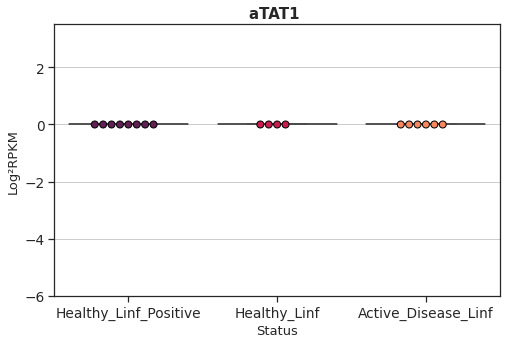

carregando


In [ ]:
import re
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", font_scale=1.25)

for i in capta_nomes:
  #if i not in ['HDAC7/51564', 'KAT6B/23522']: continue
  if i not in ['aTAT1/79969']: continue
  #break #<----------------------------------------------------------
  plt.figure(figsize=(8,5));#x,y
  plt.grid(axis='y', color='0.80')
  graficos = sns.swarmplot(
      data = rpkm_PRJEB36928.sort_values("Status", ascending=False),
      x="Status", y=i, dodge=False, size=7, alpha=1,
      palette="rocket", edgecolor='black',# hue = "Status",
      linewidth= 1 ,
      ec="Black"
      );
  
  pattern = '/[0-9]*'
  string = i
  repl = ' '
        
  nome_grafico = re.sub(pattern, repl, string)
  
  graficos = sns.boxplot(
                         data = rpkm_PRJEB36928.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1.5}
                         );

  #nome_grafico = i.replace("/","-");
  #nome_grafico  = re.sub()


  graficos.set_ylim([-6, 3.5]);
  graficos.set_xticklabels(graficos.get_xticklabels(), horizontalalignment='center')# rotation =
  graficos = plt.title(nome_grafico, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('Status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
  plt.savefig((f'{caminho_imagens}/PRJEB36928_img/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I');
  plt.show(graficos);
  print("carregando");
  

In [ ]:
import re
#sns.set_style("whitegrid")
sns.set_theme(style="darkgrid")
 
for i in kat:
  #break #<----------------------------------------------------------
  plt.figure(figsize=(8,5));#x,y

  graficos = sns.swarmplot(
      data = rpkm_PRJEB36928.sort_values("Status", ascending=False),
      x="Status", y=i, dodge=False, size=7, alpha=1,
      palette="rocket", edgecolor='black',# hue = "Status",
      linewidth= 1 ,
      ec="Black"
      );
  
  pattern = '/[0-9]*'
  string = i
  repl = ' '
        
  nome_grafico = re.sub(pattern, repl, string)
  
  graficos = sns.boxplot(
                         data = rpkm_PRJEB36928.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1.5}
                         );

  #nome_grafico = i.replace("/","-");
  #nome_grafico  = re.sub()


  #graficos.set_ylim([-10, 8]);
  graficos.set_xticklabels(graficos.get_xticklabels(), horizontalalignment='center')# rotation =
  graficos = plt.title(nome_grafico, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('Status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
  
  #plt.savefig((f'{caminho_imagens}/SIRT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando");

In [ ]:
import re
#sns.set_style("whitegrid")
sns.set_theme(style="darkgrid")
 
for i in hdac:
  #break #<----------------------------------------------------------
  plt.figure(figsize=(8,5));#x,y

  graficos = sns.swarmplot(
      data = rpkm_PRJEB36928.sort_values("Status", ascending=False),
      x="Status", y=i, dodge=False, size=7, alpha=1,
      palette="rocket", edgecolor='black',# hue = "Status",
      linewidth= 1 ,
      ec="Black"
      );
  
  pattern = '/[0-9]*'
  string = i
  repl = ' '
        
  nome_grafico = re.sub(pattern, repl, string)
  
  graficos = sns.boxplot(
                         data = rpkm_PRJEB36928.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1.5}
                         );

  #nome_grafico = i.replace("/","-");
  #nome_grafico  = re.sub()


  graficos.set_ylim([-10, 8]);
  graficos.set_xticklabels(graficos.get_xticklabels(), horizontalalignment='center')# rotation =
  graficos = plt.title(nome_grafico, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('Status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
  
  #plt.savefig((f'{caminho_imagens}/SIRT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando");

In [ ]:
import re
#sns.set_style("whitegrid")
sns.set_theme(style="darkgrid")
 
for i in sirt:
  
  #break #<----------------------------------------------------------
  plt.figure(figsize=(8,5));#x,y

  graficos = sns.swarmplot(
      data = rpkm_PRJEB36928.sort_values("Status", ascending=False),
      x="Status", y=i, dodge=False, size=7, alpha=1,
      palette="rocket", edgecolor='black',# hue = "Status",
      linewidth= 1 ,
      ec="Black"
      );
  
  pattern = '/[0-9]*'
  string = i
  repl = ' '
        
  nome_grafico = re.sub(pattern, repl, string)
  
  graficos = sns.boxplot(
                         data = rpkm_PRJEB36928.sort_values("Status", ascending=False), 
                         x="Status", y=i, showcaps=True,
                         boxprops={'facecolor':'None'},
                         showfliers=True,whiskerprops={'linewidth':1.5}
                         );

  #nome_grafico = i.replace("/","-");
  #nome_grafico  = re.sub()


  graficos.set_ylim([-10, 8]);
  graficos.set_xticklabels(graficos.get_xticklabels(), horizontalalignment='center')# rotation =
  graficos = plt.title(nome_grafico, fontsize=15, weight= 'bold');
  graficos = plt.xlabel('Status', fontdict={'size': 13});
  graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
  
  #plt.savefig((f'{caminho_imagens}/SIRT/png/{nome_grafico}.png'), dpi=300, format='png', bbox_inches='tight', pad_inches=0.2, bbox=None, pad=None, dashes=None, loc='upper left', rot=0, vmax='I', vmin='I', hmax='I', hmin='I')
  plt.show(graficos);
  print("carregando");

In [2]:
import pygame
pygame.init()

# Especificar o nome do arquivo de áudio
arquivo_audio = "/home/carlitos/Música/Musicas/9Mm.mp3"

# Inicializar o mixer de áudio do Pygame
pygame.mixer.init()

# Carregar o arquivo de áudio
som = pygame.mixer.Sound(arquivo_audio)

# Reproduzir o áudio
som.play()

# Manter o programa em execução para ouvir o áudio
# pygame.time.delay(int(som.get_length() * 1000) + 100)
pygame.time.delay(int(30 * 1000) + 100)

# Finalizar o Pygame
pygame.quit()
